### This program reads data

In [21]:
# Libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from os import listdir
from os import path
import pandas as pd
import random 
import csv
import re

In [22]:
# tokenize words
tokenizer = RegexpTokenizer(r'\w+')
# list of stops words to be removed
stop_words = stopwords.words('english')
# max number of email for each class
# spam does has les than 2000 
max_email = 1500
max_spam = 1700

### Gets the path of the spam email that is in the junk_email files. 

In [23]:
# This function gets the emails from the junk email folder
def get_spam_email(): 
    spam_path=[]
    path_mail = 'maildir'

    for maildir in listdir(path_mail):
        maildir_path = path.join(path_mail, maildir)

        for mails in listdir(maildir_path):
            emails_spam = path.join(maildir_path, mails)

            if 'junk_email' == mails:   
                #print(emails_spam)
                for e in listdir(emails_spam):
                    #print(e)
                    if '.ipynb_checkpoints' == e:
                        continue               
                    spam_path.append(path.join(emails_spam, e))
                    '''store the first 2000 spam emails'''
                    if len(spam_path) > max_spam:
                        break
            
    return spam_path

### Gets the path of the email that is in the sent files. 

In [24]:
def get_emails():
    email_path=[]
    path_mail = 'maildir'
    
    for maildir in listdir(path_mail):
        maildir_path = path.join(path_mail, maildir)

        for mails in listdir(maildir_path):
            emails_spam = path.join(maildir_path, mails)

            # checking if there is a file that does not belong to the folders
            if path.isfile(emails_spam):
                continue
            
            for e in listdir(emails_spam):
              
                if path.isfile(e): 
                    print(e)
                    continue
                    
                if path.isdir(e):
                    print(e)
                    continue
                if e in ['clickathome', 'gas', 'loaddata','enron_accelerator']:
                    print("never see this")
                    continue               
                email_path.append(path.join(emails_spam, e))
          
    return email_path

### ramdomize dataset

In [25]:
# gets the paths files
spam_email_path = get_spam_email()
email_path      = get_emails()
random.seed(89)
random.shuffle(spam_email_path)
random.shuffle(email_path)


.ipynb_checkpoints
.ipynb_checkpoints
.ipynb_checkpoints
never see this
never see this
.ipynb_checkpoints
.ipynb_checkpoints
.ipynb_checkpoints
never see this
never see this
.ipynb_checkpoints
.ipynb_checkpoints
.ipynb_checkpoints
.ipynb_checkpoints
.ipynb_checkpoints
.ipynb_checkpoints
.ipynb_checkpoints
.ipynb_checkpoints
.ipynb_checkpoints
never see this
never see this
.ipynb_checkpoints
.ipynb_checkpoints


In [28]:
# It tokenize the sentences and remove the stop words 
def tokenize_rm_stop_word(line):
    line = tokenizer.tokenize(line)
    line = [w for w in line if not w in stop_words]       
    return line 

### Gets the non-spam from the folders and store it into a list.

In [29]:
spam_text=[]
for em_sp_path in spam_email_path:
    with open (em_sp_path) as read:
        line = read.readlines()[15:]
        temp=[]
        for ln in line:
            ln = ln.lower().strip()
            if len(ln) == 0:
                continue
            # removing all character that is not a letter or number
            #ln2 = re.sub(r'[^a-zA-Z0-9\s]', ' ', ln)
            #ln2 = re.sub(r'[^a-zA-Z\s]', ' ', ln)
            ln2 = re.sub(r'[^a-zA-Z]', ' ', ln)
            
            #ln2 = ln2.split()
            ln2 = tokenize_rm_stop_word(ln2)
            ln2 = ' '.join(ln2)
            # remove stop workds
            #ln3 = tokenize_rm_stop_word(ln2)
            # make it string again 
            #ln3 = ' '.join(ln3)
            temp.append(ln2)

        spam_text.append(' '.join(temp))
    

In [30]:
spam_text[1]

'http www jumpsociety com hello visited www jumpsociety com noticed website listed search engines sure service number people visit website definitely increase seekercenter unique technology instantly submits website search engines directories really low cost effective way advertise site details please go seekercenter net give website maximum exposure today looking forward hearing best regards vanessa lintner sales marketing www seekercenter net receiving email opted receive special offers partner website feel received email error wish receive additional special offers please enter email address click button remove'

### Gets the emails from the folders and store it into a list.

In [31]:
def get_batch_of_emails(email_path):
    
    email_text=[]
    
    for em_path in email_path:
        try:
            with open (em_path) as read:
                temp=[]
                start_reading=False
                

                for line in read.readlines():
                    if 'X-FileName:' in line:
                        start_reading = True
                        continue
                    if start_reading:

                        line = line.lower().strip()
                        if len(line) == 0:
                            continue
                        # removing all character that is not a letter or number
                        #line = re.sub(r'[^a-zA-Z0-9\s]', ' ', line)
                        #line = re.sub(r'[^a-zA-Z\s]', ' ', line)
                        line = re.sub(r'[^a-zA-Z]', ' ', line)

                        #line = line.split()
                        line = tokenize_rm_stop_word(line)
                        line = ' '.join(line)

                        # remove stop workds
                        #ln3 = tokenize_rm_stop_word(ln2)
                        # make it string again 
                        #ln3 = ' '.join(ln3)
                        temp.append(line)
        except:
            print("Could not open ",em_path)
            continue
        email_text.append(' '.join(temp))
    return email_text
    

In [32]:
len(email_path)

492685

In [33]:
number_of_batches = 50
max_email=1500
emails_text = []
start=0
stop=max_email

for i in range(number_of_batches):
    batch = email_path[start:stop]
    
    txt = get_batch_of_emails(batch)
    print(len(txt))
    emails_text.append(txt)
    start = stop
    stop = stop + max_email


Could not open  maildir/gay-r/sent/59.
1499
Could not open  maildir/taylor-m/inbox/enron_south
1499
Could not open  maildir/hyvl-d/miscellaneous/parking
1499
Could not open  maildir/mcconnell-m/tw_accounts/pepl
Could not open  maildir/taylor-m/online_trading/product_descriptions
1498
Could not open  maildir/griffith-j/vpp/brazos_lp
Could not open  maildir/shapiro-r/2002_budget/2001_budget
Could not open  maildir/germany-c/bankrupt/tdc_energy
1497
Could not open  maildir/mcconnell-m/tw_accounts/astra
Could not open  maildir/shackleton-s/all_documents/2856.
Could not open  maildir/baughman-d/ubsw_energy/transmission
1497
Could not open  maildir/symes-k/deal_communication/cal_px
Could not open  maildir/beck-s/inbox/100.
Could not open  maildir/sanders-r/deleted_items/duke
1497
Could not open  maildir/baughman-d/enron_power/24_hour
Could not open  maildir/mclaughlin-e/private_folders/corp_info_announcements
Could not open  maildir/taylor-m/inbox/emissions_e_mail
Could not open  maildir/pre

In [34]:
print("Total Email: ", len(emails_text[1]))
print("Total Spams: ", len(spam_text))

Total Email:  1499
Total Spams:  1360


### Save list into a CSV file for better display

In [35]:

for i in range(len(emails_text)):
    path = 'batches/email_batch_'+ str(i+1) +'.csv'
    with open(path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([ "email", "category"])

        for j in range(len(emails_text[i])):
            writer.writerow([emails_text[i][j], 0])
            
        for k in range(len(spam_text)):
            writer.writerow([spam_text[k], 1])

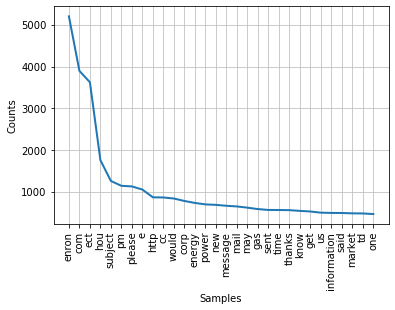

In [36]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk

tokenized_word=[]
fdist = FreqDist()
for i in emails_text[4]:
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(30,cumulative=False)
plt.show()



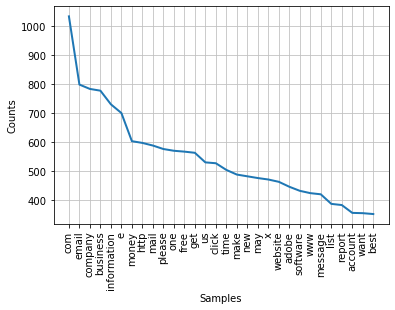

In [37]:
tokenized_word=[]
fdist = FreqDist()
for i in spam_text:
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(30,cumulative=False)
plt.show()

In [16]:
import sklearn
print(sklearn.__version__)

0.22.2.post1
